In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d yasserh/twitter-tweets-sentiment-dataset

 81% 1.00M/1.23M [00:01<00:00, 988kB/s]
100% 1.23M/1.23M [00:01<00:00, 1.17MB/s]


In [ ]:
# unzipped the dataset
import zipfile
zip_ref=zipfile.ZipFile('/content/twitter-tweets-sentiment-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/Tweets.csv')

In [ ]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
data.drop(columns={'textID','selected_text'},inplace=True)

In [ ]:
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
data.shape

(27481, 2)

In [ ]:
data.isnull().sum()

text         1
sentiment    0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


In [ ]:
data.describe()

,text,sentiment
count,27480,27480
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11117


<Axes: xlabel='sentiment', ylabel='count'>

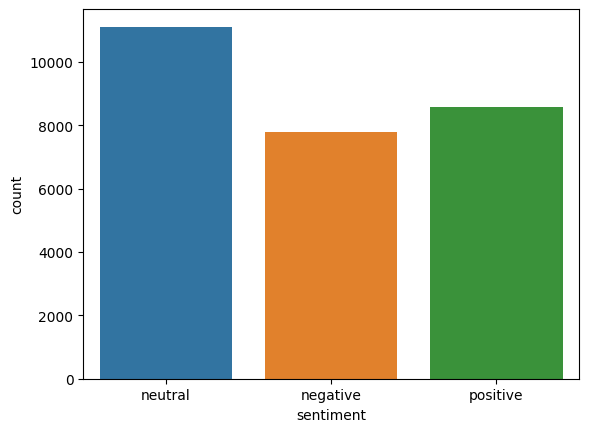

In [ ]:
sns.countplot(x='sentiment',data=data)

In [ ]:
# data cleaning
data['text'][5]

'http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth'

In [ ]:
import re
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.5 MB/s eta 0:00:00


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import contractions


In [ ]:
def text_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_text_data = []  # list of cleaned tweets
for txt in data['text']:
  txt=txt.replace('`',"'")

  cleaned_text_data.append(text_cleaner_without_stopwords(txt))

In [ ]:
cleaned_text_data

['i would have responded if i were going ',
 'sooo sad i will miss you here in san diego ',
 'my bos is bullying me ',
 'what interview leave me alone ',
 'son of why could not they put them on the release we already bought ',
 'some shameless plugging for the best ranger forum on earth ',
 'am feeding for the baby are fun when he is all smile and coo ',
 'soooo high ',
 'both of you ',
 'journey wow you just became cooler hehe is that possible ',
 'a much a i love to be hopeful i reckon the chance are minimal p i am never going to get my cake and stuff ',
 'i really really like the song love story by taylor swift ',
 'my sharpie is running dangerously low on ink ',
 'i want to go to music tonight but i lost my voice ',
 'test test from the lg env ',
 'uh oh i am sunburned ',
 's ok trying to plot alternative a we speak sigh ',
 'i have been sick for the past few day and thus my hair look wierd if i did not have a hat on it would look ',
 'is back home now going to miss every one ',
 '

In [ ]:
data['cleaned_text']=cleaned_text_data

In [ ]:
data.head()

,text,sentiment,cleaned_text
0,"I`d have responded, if I were going",neutral,i would have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my bos is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,son of why could not they put them on the rele...


### getting the world cloud for each sentiment

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
neutral_sentiment=wc.generate(data[data['sentiment']=='neutral']['cleaned_text'].str.cat(sep=" "))

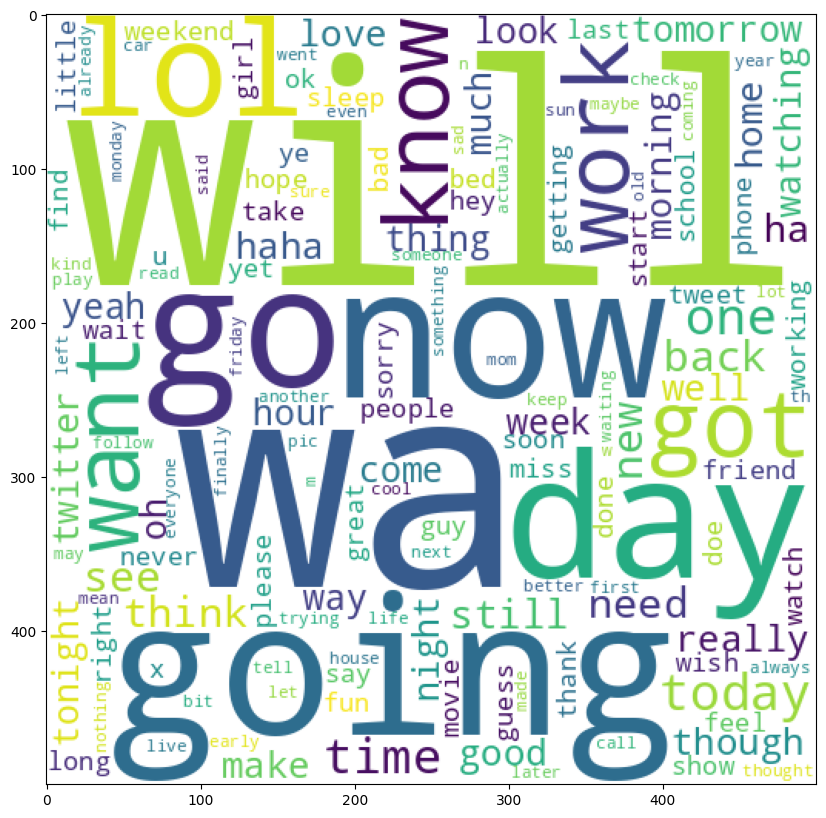

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(neutral_sentiment)

In [ ]:
positive_sentiment=wc.generate(data[data['sentiment']=='positive']['cleaned_text'].str.cat(sep=" "))

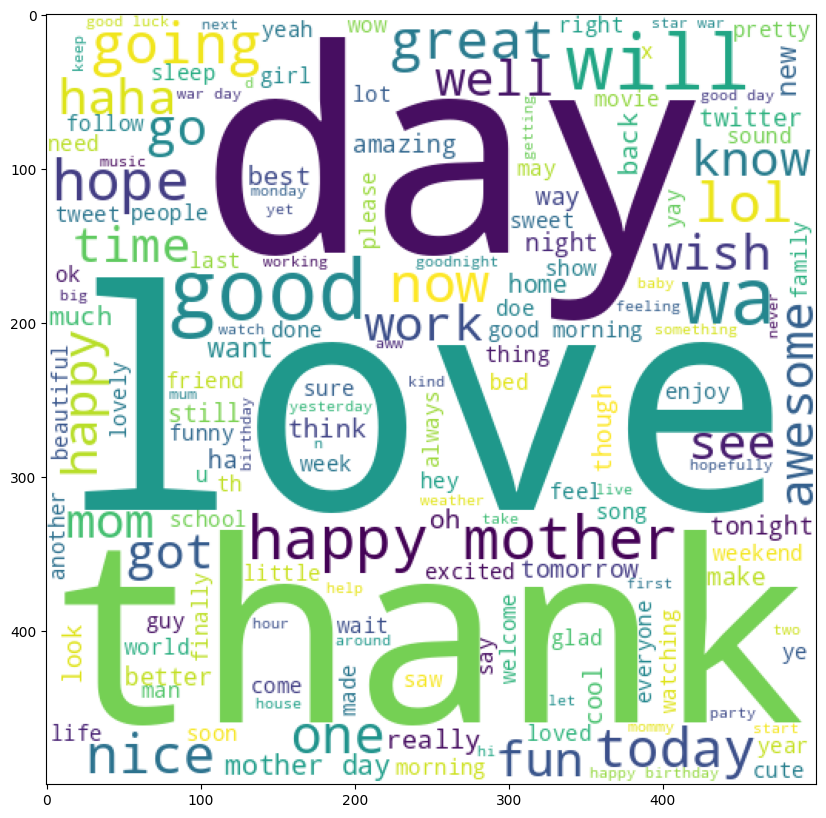

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(positive_sentiment)

In [ ]:
negative_sentiment=wc.generate(data[data['sentiment']=='negative']['cleaned_text'].str.cat(sep=" "))

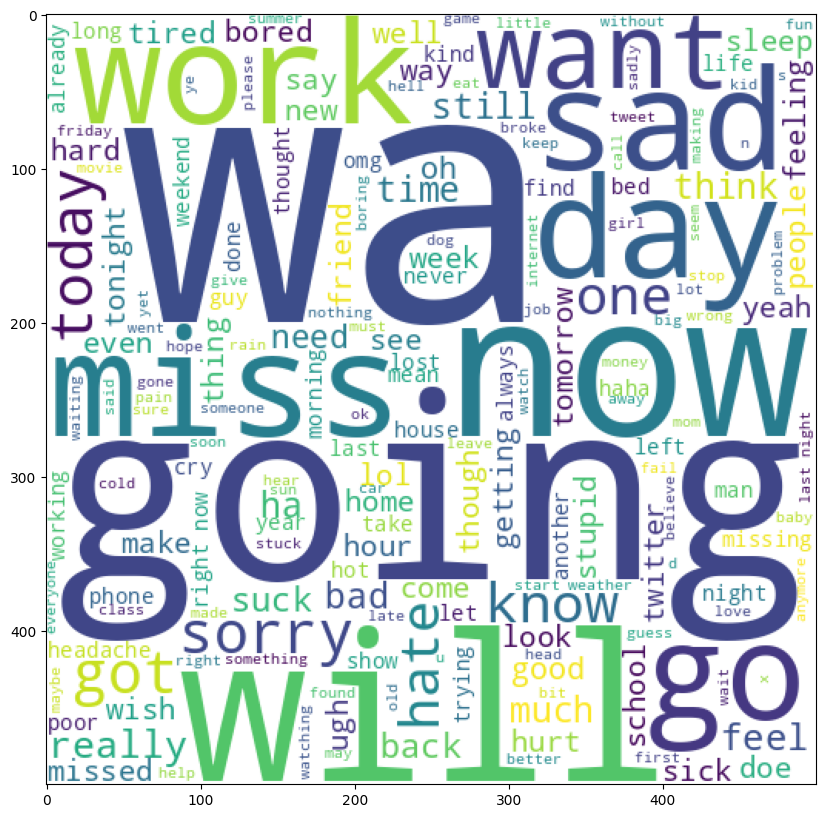

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(negative_sentiment)

In [ ]:
#getting the top 30 words from neutral sentiment
neutral_sentiment_corpus=[]

for words in data[data['sentiment']=='neutral']['cleaned_text'].tolist():
  for word in words.split():
    neutral_sentiment_corpus.append(word)

In [ ]:
from collections import Counter
neutral_df=pd.DataFrame(Counter(neutral_sentiment_corpus).most_common(30))


In [ ]:
neutral_df

,0,1
0,i,6596
1,to,4520
2,the,3588
3,is,2943
4,a,2858
5,you,2488
6,it,2340
7,not,2041
8,my,2017
9,and,1877


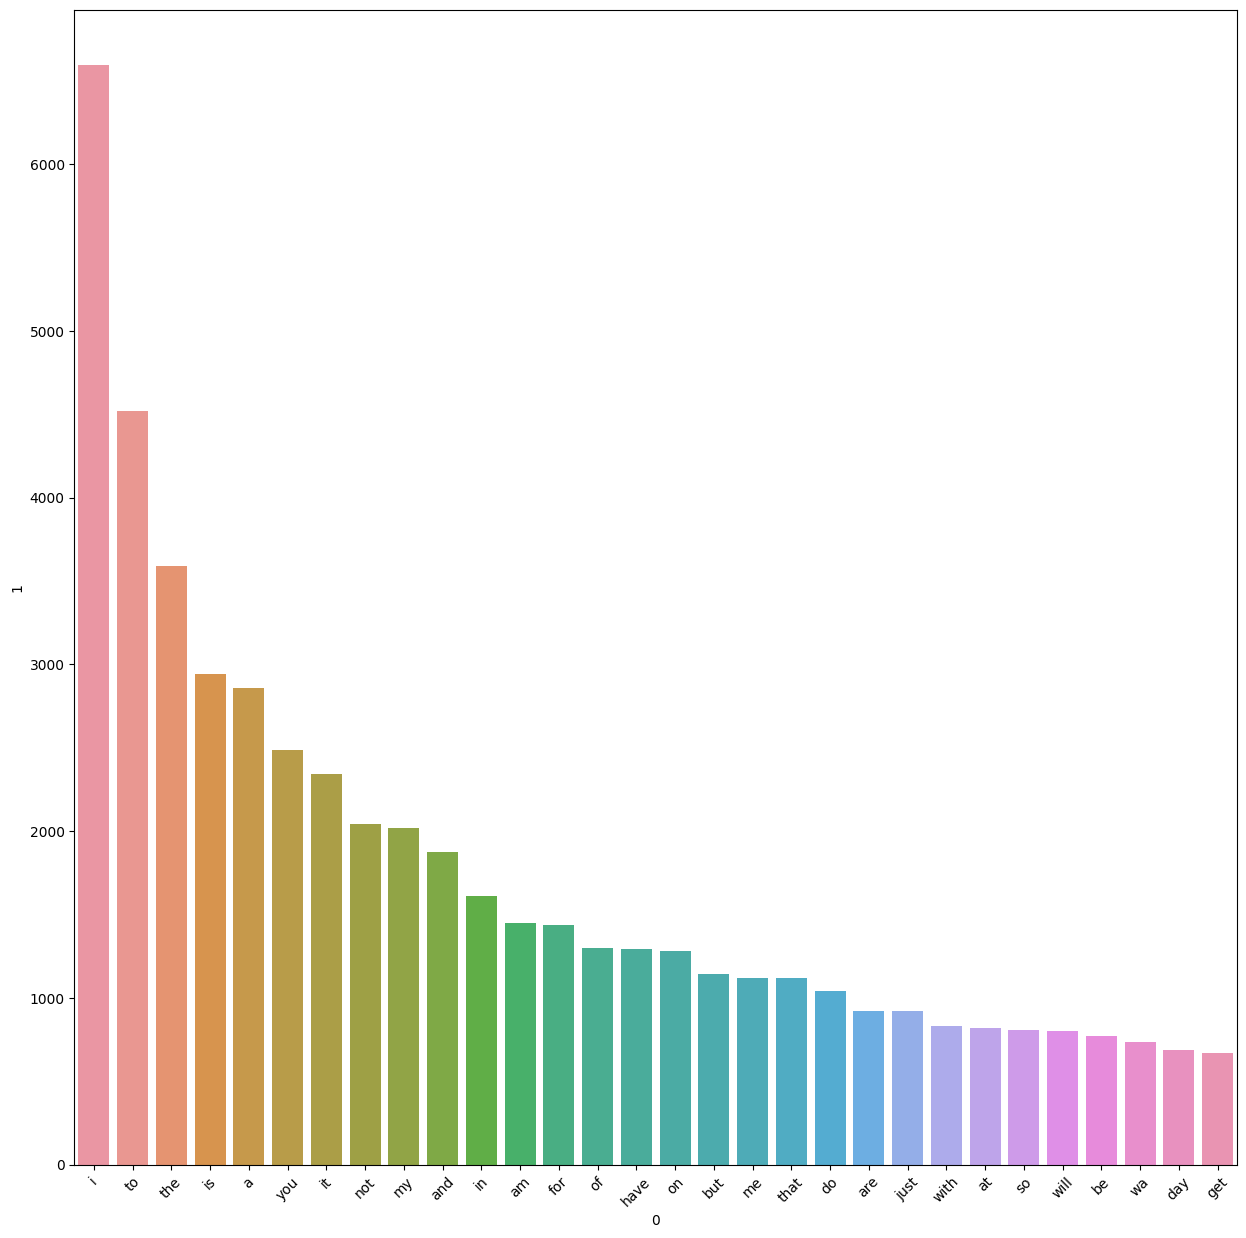

In [ ]:
plt.figure(figsize=(15,15))

plt.xticks(rotation=45)
sns.barplot(x=neutral_df[0],y=neutral_df[1])
plt.show()

In [ ]:
#getting the top 30 words from neutral sentiment
positive_sentiment_corpus=[]

for words in data[data['sentiment']=='positive']['cleaned_text'].tolist():
  for word in words.split():
    positive_sentiment_corpus.append(word)

In [ ]:
positive_df=pd.DataFrame(Counter(positive_sentiment_corpus).most_common(30))


In [ ]:
positive_df

,0,1
0,i,4907
1,to,3204
2,the,3060
3,you,2815
4,a,2664
5,is,2603
6,it,2006
7,and,1695
8,my,1489
9,day,1375


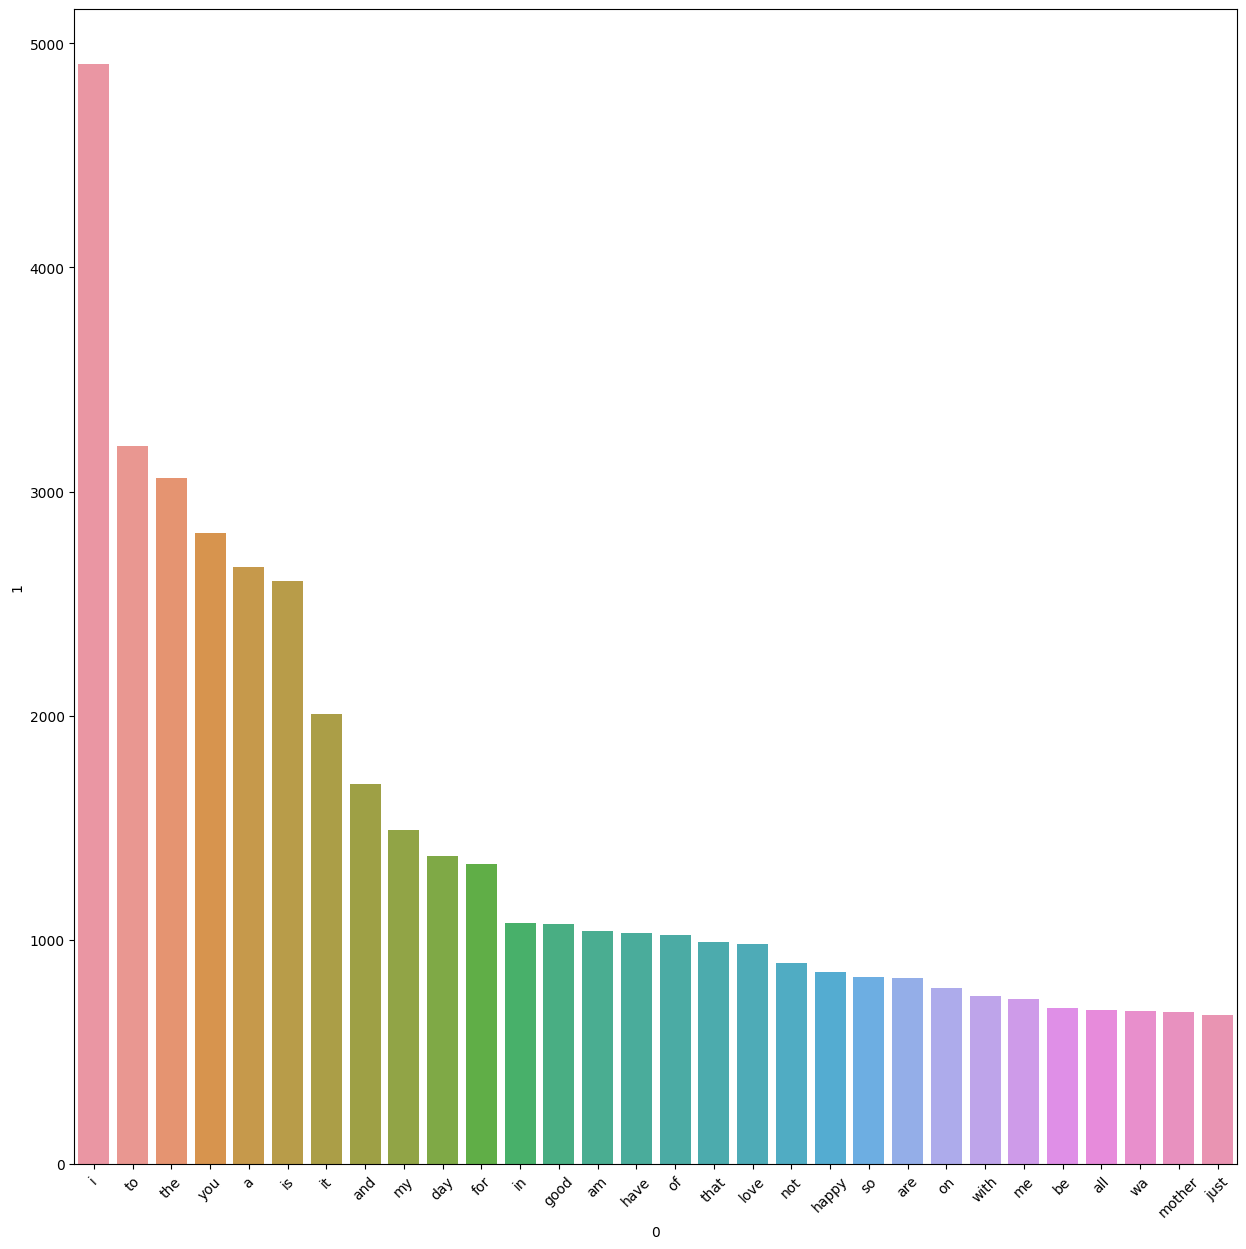

In [ ]:
plt.figure(figsize=(15,15))

plt.xticks(rotation=45)
sns.barplot(x=positive_df[0],y=positive_df[1])
plt.show()

In [ ]:
#getting the top 30 words from neutral sentiment
negative_sentiment_corpus=[]

for words in data[data['sentiment']=='negative']['cleaned_text'].tolist():
  for word in words.split():
    negative_sentiment_corpus.append(word)

In [ ]:
negative_df=pd.DataFrame(Counter(negative_sentiment_corpus).most_common(30))

In [ ]:
negative_df

,0,1
0,i,6223
1,to,3228
2,the,2479
3,is,2427
4,not,2090
5,my,2043
6,a,2025
7,it,1930
8,am,1633
9,and,1596


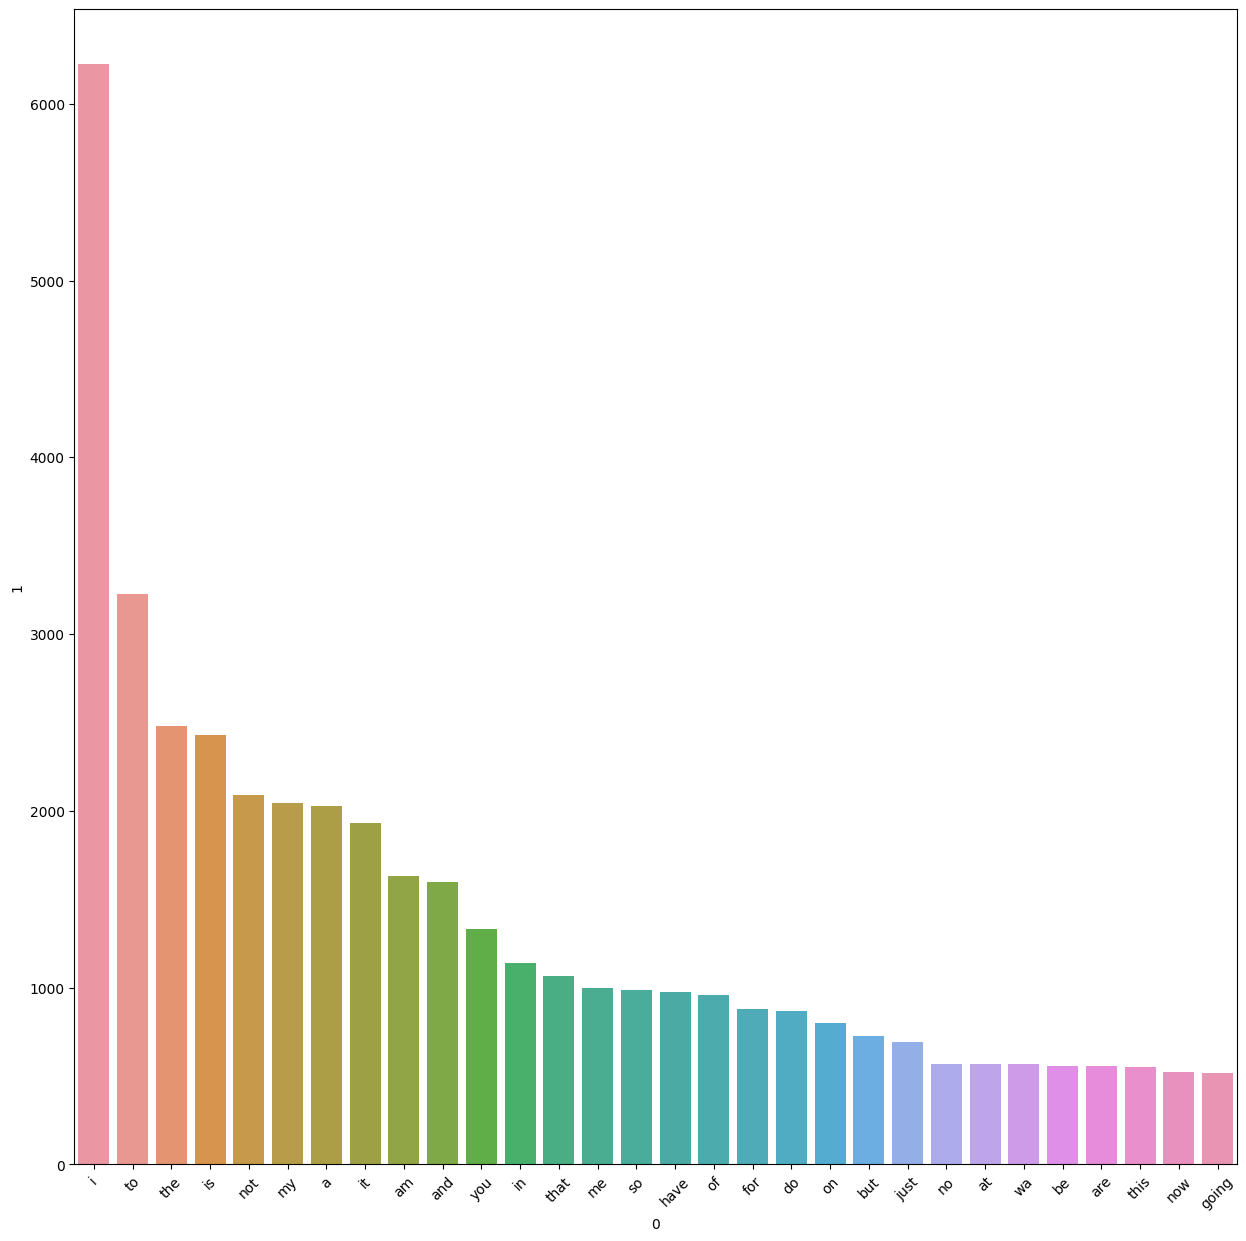

In [ ]:
plt.figure(figsize=(15,15))

plt.xticks(rotation=45)
sns.barplot(x=negative_df[0],y=negative_df[1])
plt.show()

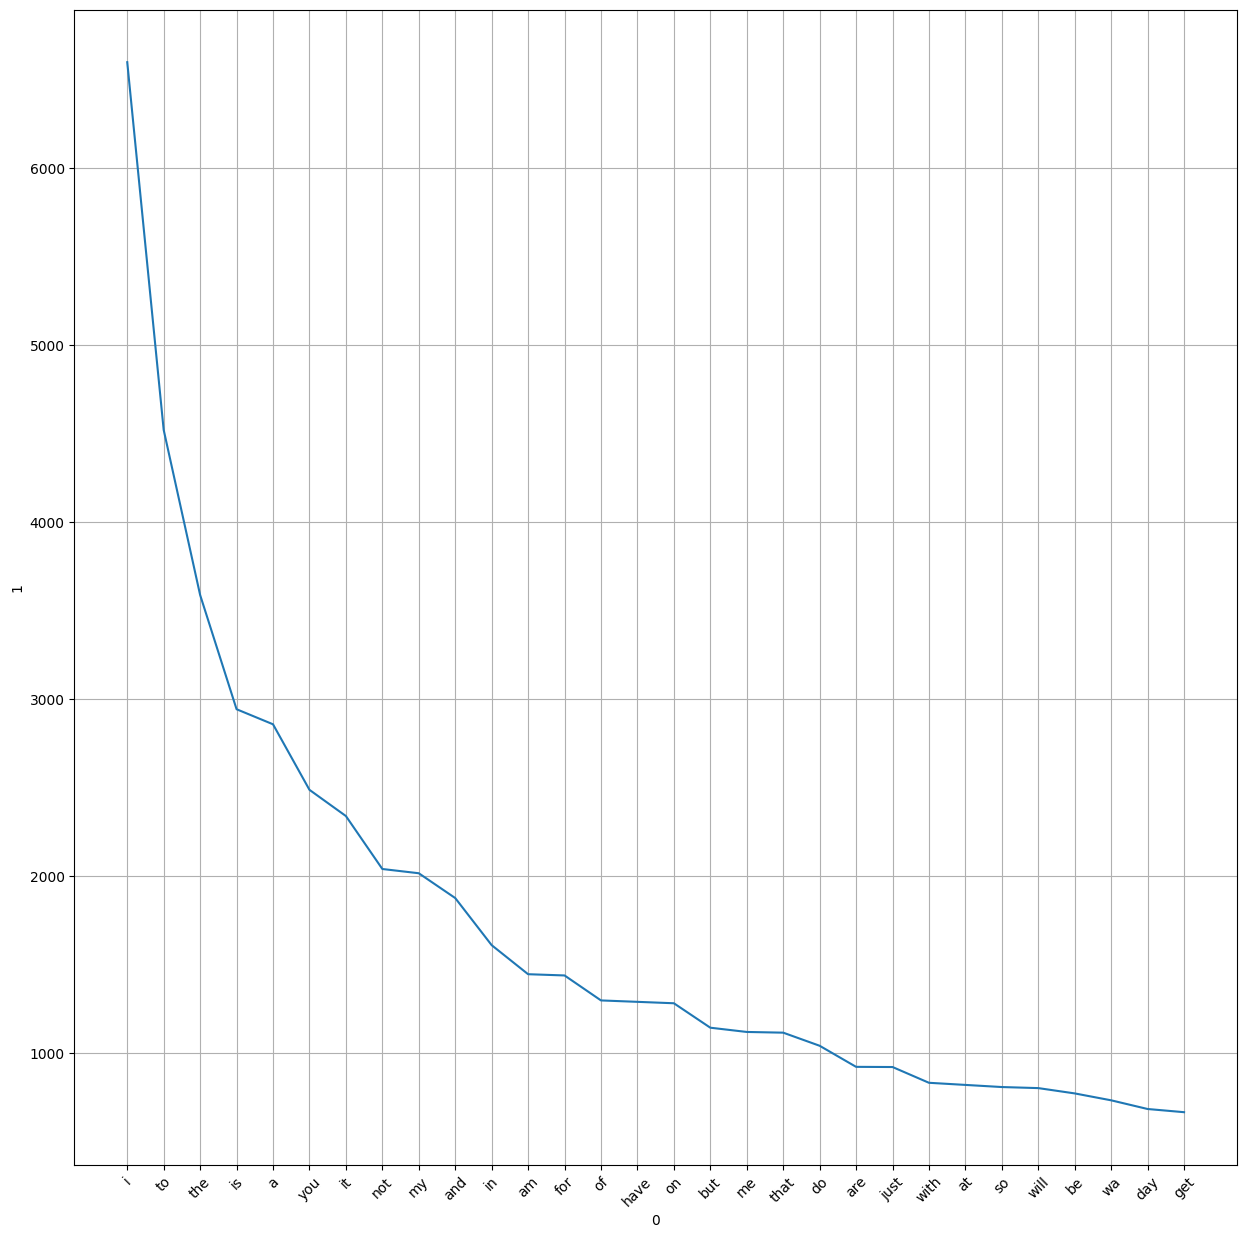

In [ ]:
plt.figure(figsize=(15,15))

plt.xticks(rotation=45)
sns.lineplot(x=neutral_df[0],y=neutral_df[1])
plt.grid()
plt.show()

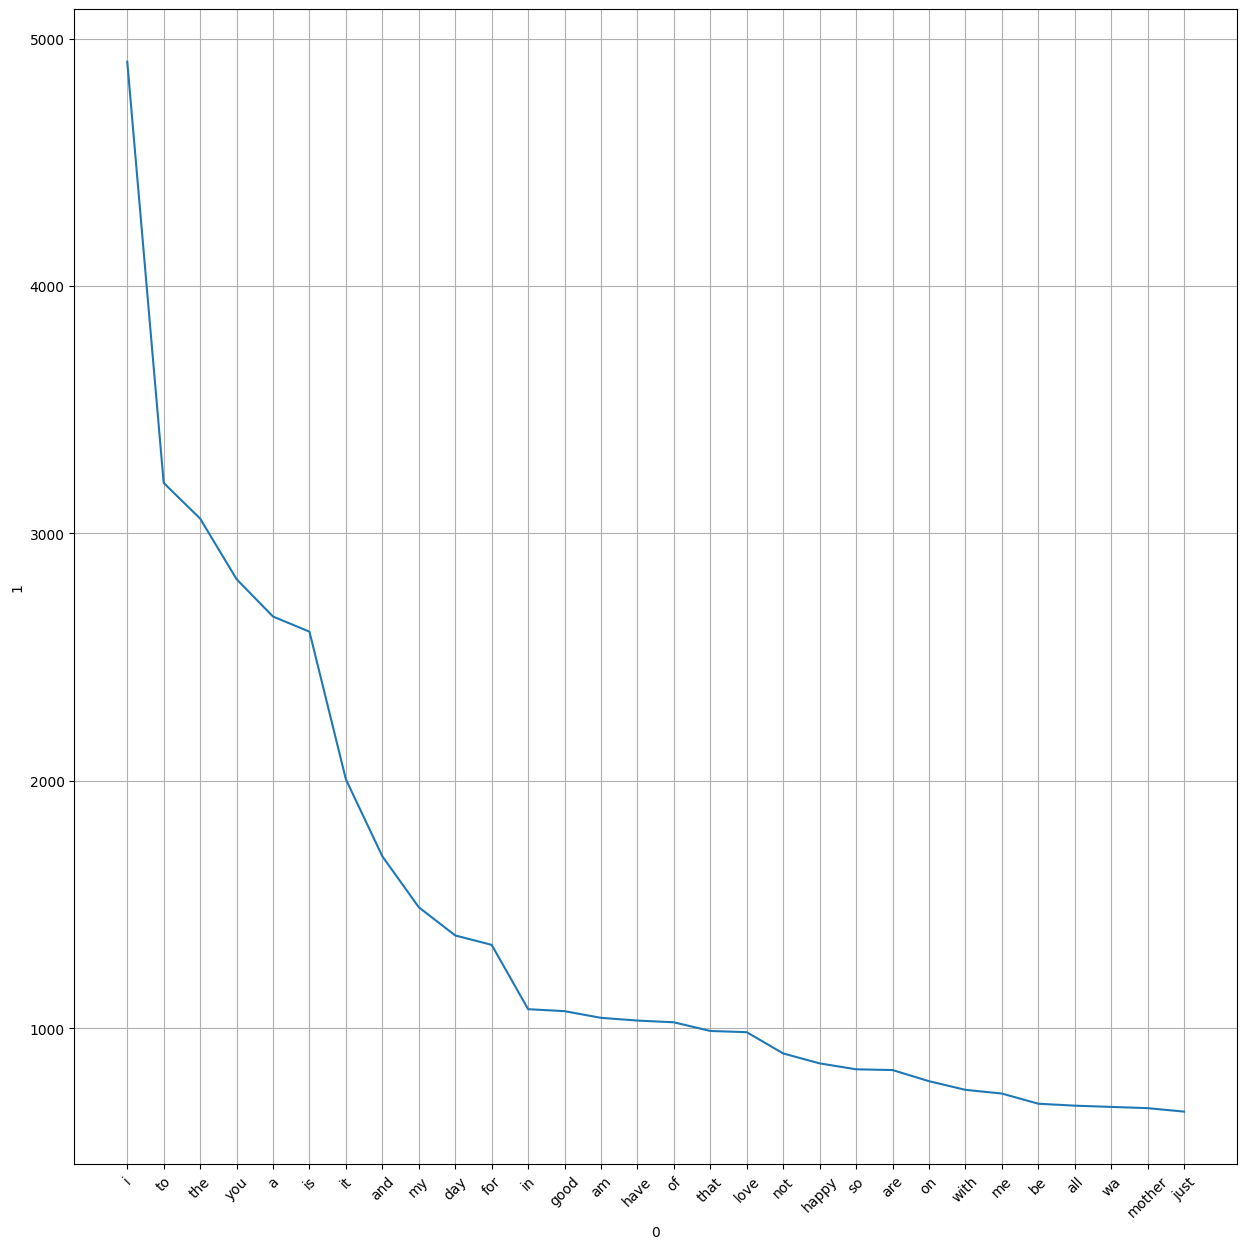

In [ ]:
plt.figure(figsize=(15,15))

plt.xticks(rotation=45)
sns.lineplot(x=positive_df[0],y=positive_df[1])
plt.grid()
plt.show()

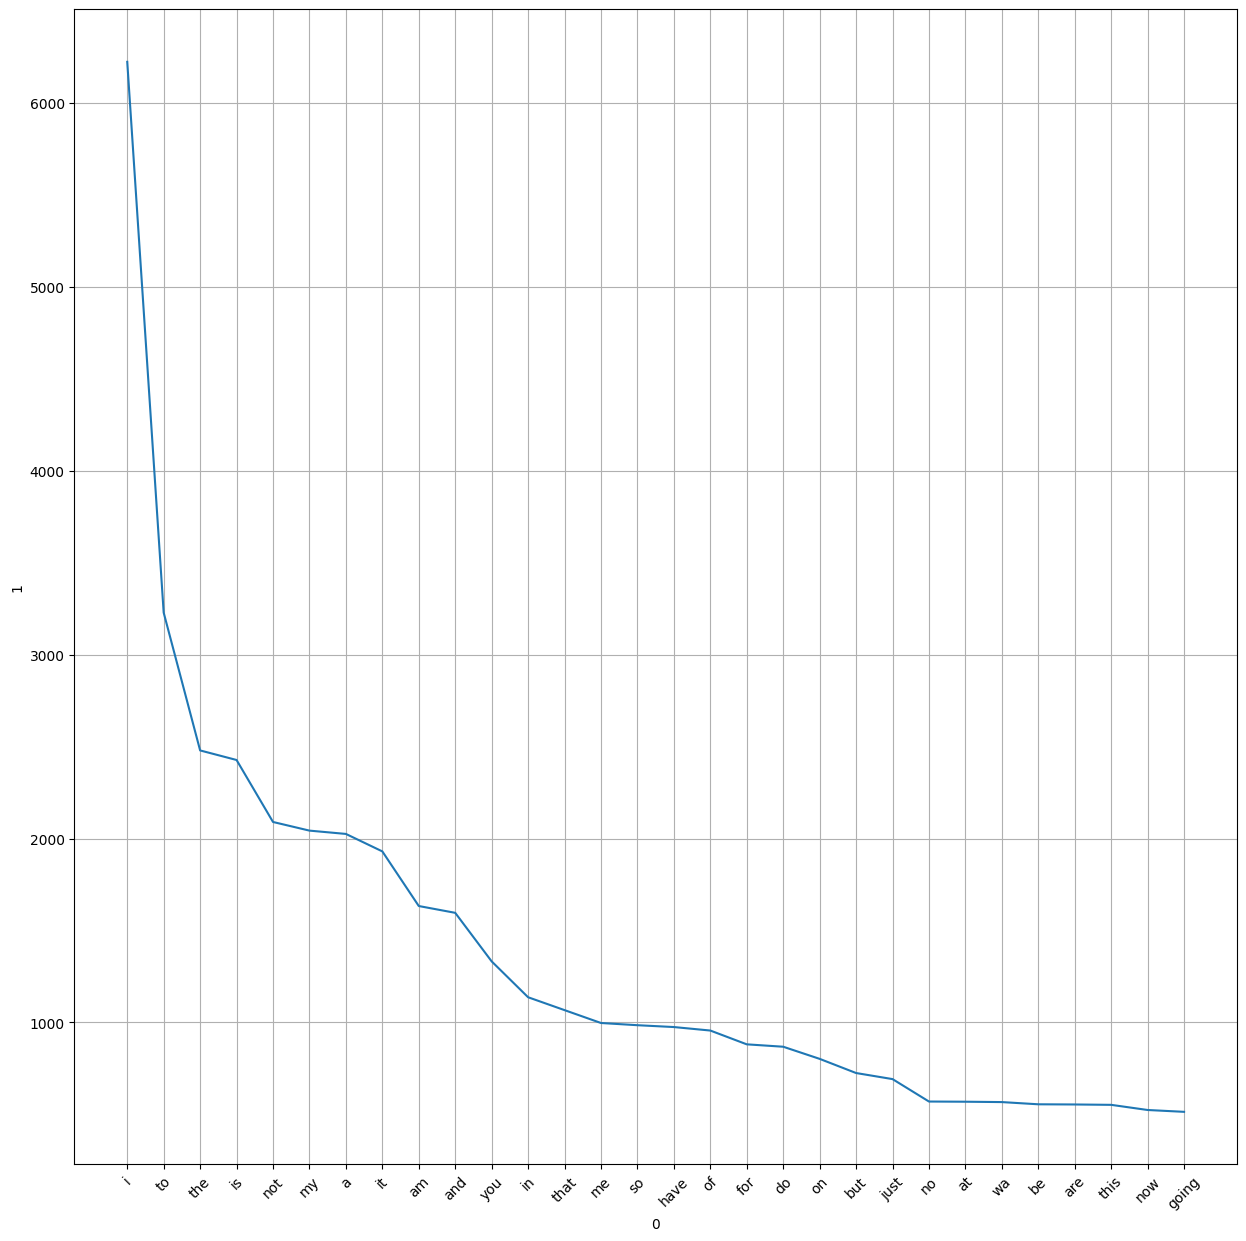

In [ ]:
# displaying with line plot
plt.figure(figsize=(15,15))

plt.xticks(rotation=45)
sns.lineplot(x=negative_df[0],y=negative_df[1])
plt.grid()
plt.show()

## Building a model

In [ ]:
# converting the target columns in the numerical form using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
data['sentiment']=encoder.fit_transform(data['sentiment'])

In [ ]:
data['sentiment'].value_counts()

1    11117
2     8582
0     7781
Name: sentiment, dtype: int64

In [ ]:
# first we need to convert the text into the vector
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3050)


In [ ]:
X=tfidf.fit_transform(data['cleaned_text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=data['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(27480, 3050) (21984, 3050) (5496, 3050)


In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC( random_state = 1)
classifier.fit(X_train,y_train)

LinearSVC(random_state=1)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 2, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
acc=accuracy_score(y_pred,y_test)

In [ ]:
acc

0.6897743813682679

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 986,  359,   77],
       [ 481, 1548,  410],
       [  98,  280, 1257]])

<Axes: >

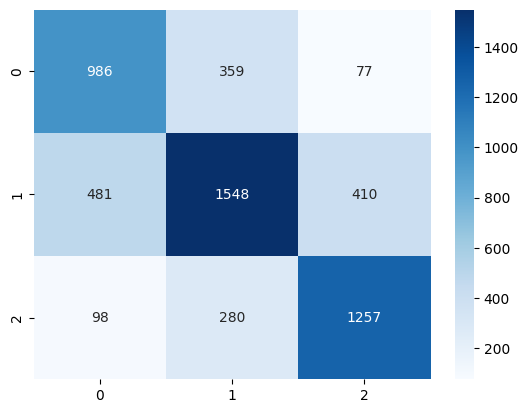

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap='Blues', fmt='g')

In [ ]:
# we can increase the accuracy by performing hyperparameter tuning but due to limited resources and
# limited resource capacity i cannot hyperparameter tuning with SUPPORT VECTOR CLASSIFIER

In [ ]:
import pickle
pickle.dump(classifier,open('sentiment_model.pkl', 'wb'))

In [ ]:
pickle.dump(tfidf,open('vectorizers.pkl','wb'))